# Explore here

In [30]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import missingno as msno



In [32]:
dataset = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df = pd.DataFrame(dataset)
df



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
count_unique = df.nunique()
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.755053,7.029962,23.274466,7.143982,112.781327,4.727099
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143242,20.510550,44.550582,32.952519,131.622289,0.698161
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000,2.302585
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,4.234107
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,4.663439
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,5.164786
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,9.210340


<function matplotlib.pyplot.show(close=None, block=None)>

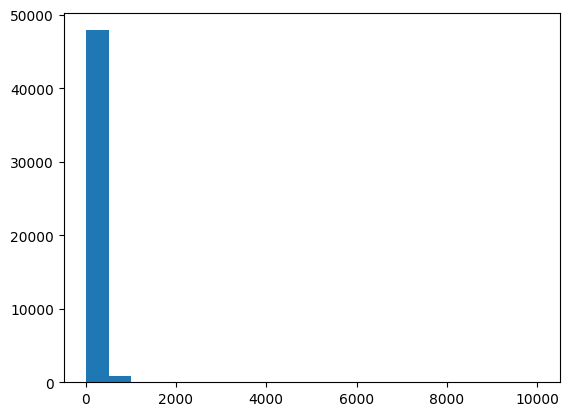

In [ ]:
y = df.price.values
#replace 0 values by average of similar advertisements
imp_knn = KNNImputer(n_neighbors=3)
df['price'] = df['price'].replace(0, np.nan)
df[['price']] = imp_knn.fit_transform(df[['price']])  

plt.hist(y, bins=20)
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc49bf86590>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc49bf87990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc49bf85cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc49bf74990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc49bf75150>],
 'means': []}

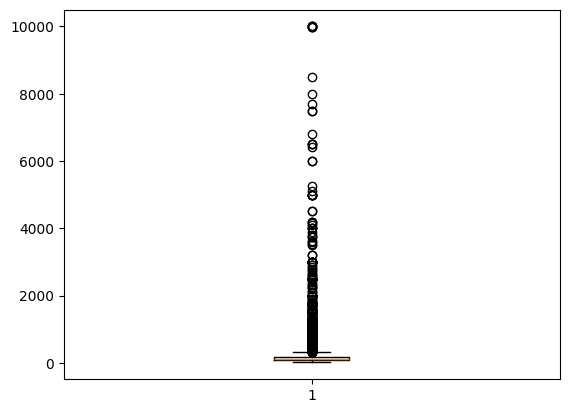

In [ ]:
plt.boxplot(y)

In [ ]:
df['log_price'] = np.log(df.price)

[]

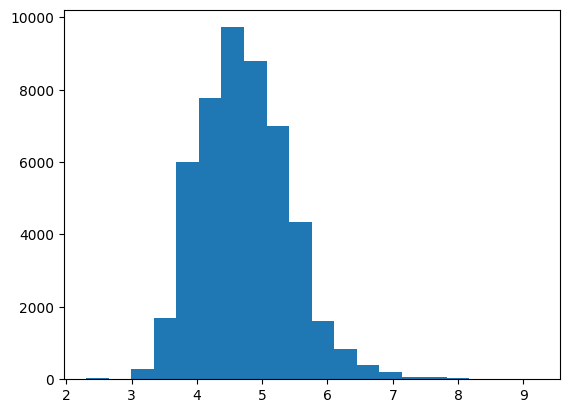

In [ ]:
plt.hist(df['log_price'], bins=20)
plt.plot()

In [ ]:
df.isna().mean()*100

id                                0.000000
name                              0.032723
host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
log_price                         0.000000
dtype: float64

In [50]:
df.drop(['last_review', 'reviews_per_month'], inplace=True, axis=1)

KeyError: "['last_review', 'reviews_per_month'] not found in axis"

<Axes: >

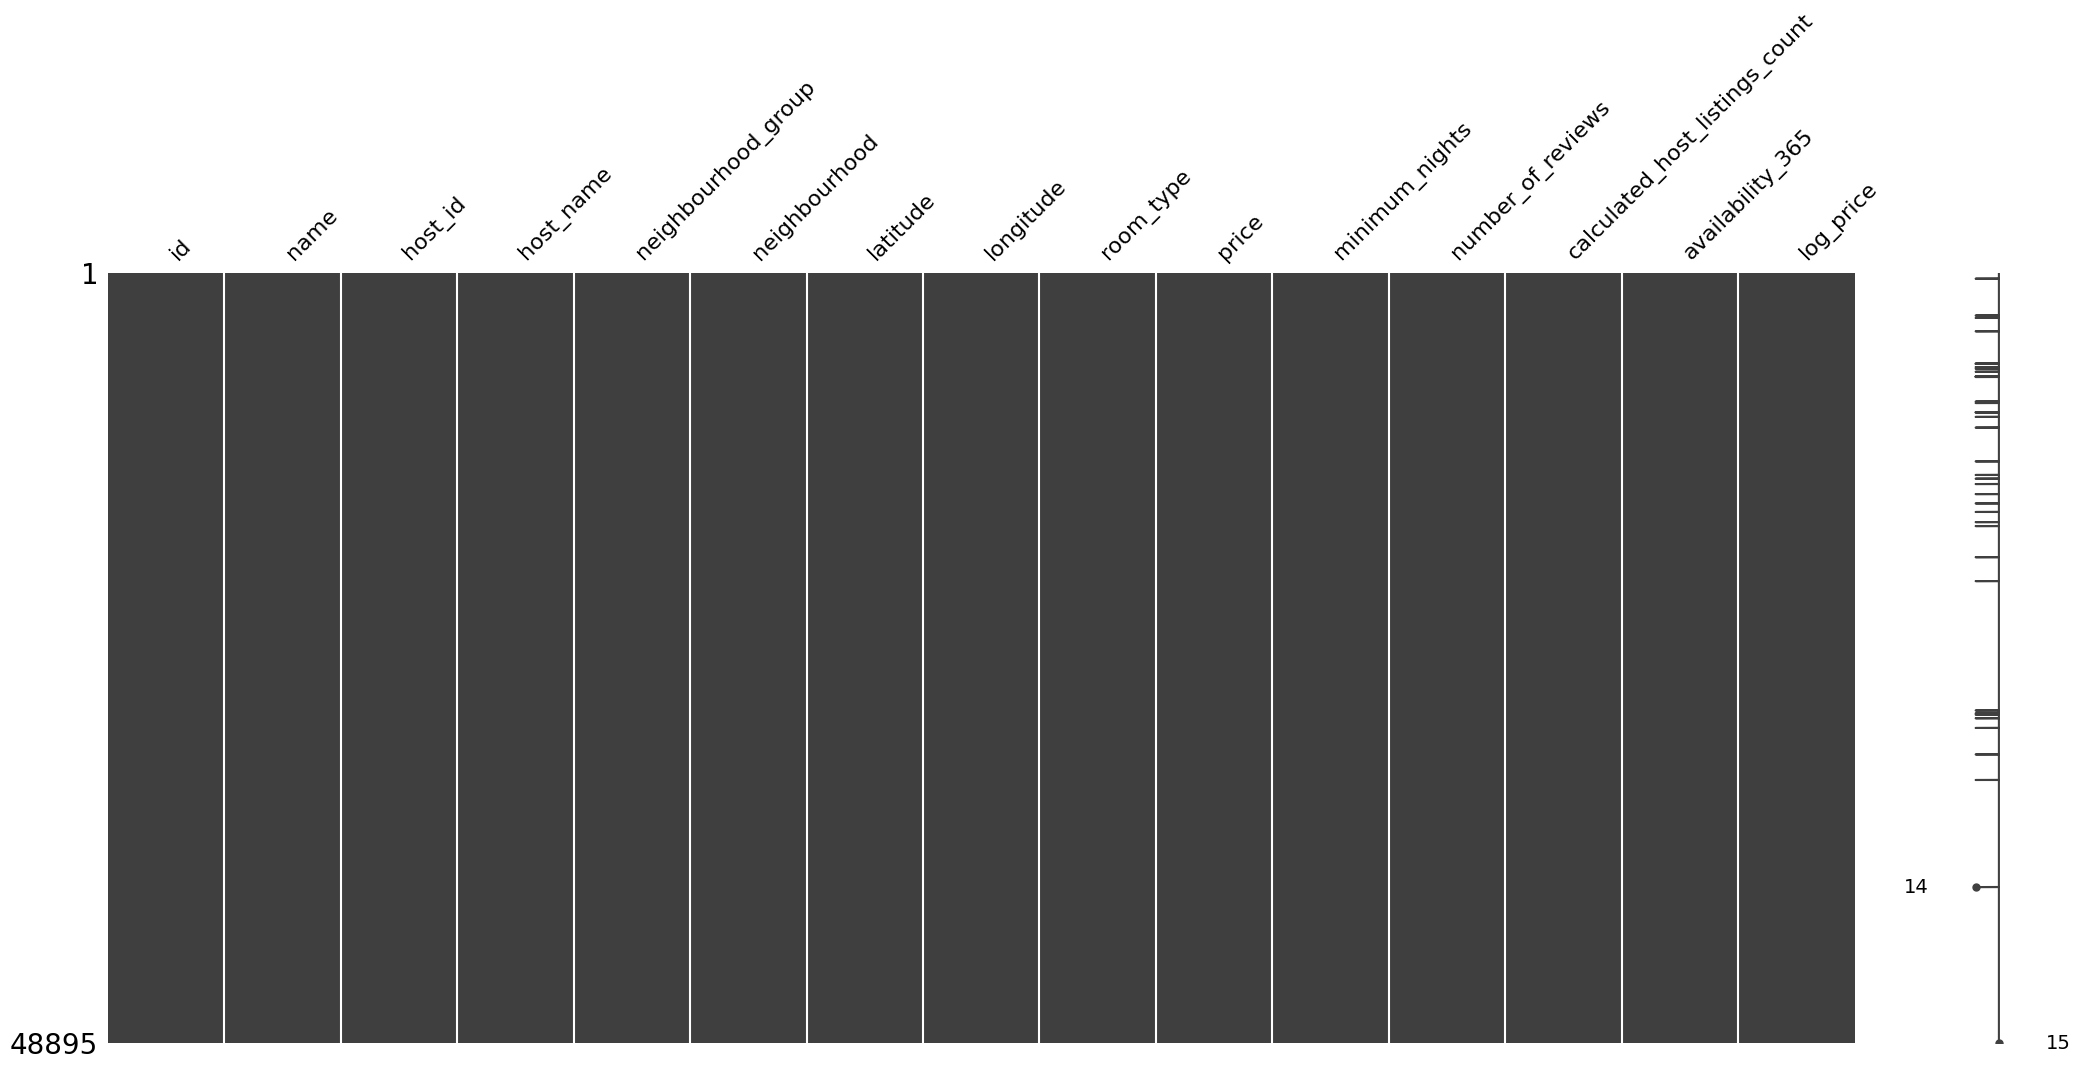

In [ ]:
msno.matrix(df)

In [52]:
x = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).